## Career Recommendation System
Implementation of a machine learning model to recommend careers to students based on their scores and other features.


### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

### Data Exploration and Cleaning

In [14]:
df1 = pd.read_csv(r"C:\Users\hp\Career-perspect-of-Individaul-using-Recommendar-System\student-scores.csv")

df = df1.copy()
df.head()

,id,first_name,last_name,email,gender,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,career_aspiration,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score
0,1,Paul,Casey,paul.casey.1@gslingacademy.com,male,False,3,False,27,Lawyer,73,81,93,97,63,80,87
1,2,Danielle,Sandoval,danielle.sandoval.2@gslingacademy.com,female,False,2,False,47,Doctor,90,86,96,100,90,88,90
2,3,Tina,Andrews,tina.andrews.3@gslingacademy.com,female,False,9,True,13,Government Officer,81,97,95,96,65,77,94
3,4,Tara,Clark,tara.clark.4@gslingacademy.com,female,False,5,False,3,Artist,71,74,88,80,89,63,86
4,5,Anthony,Campos,anthony.campos.5@gslingacademy.com,male,False,5,False,10,Unknown,84,77,65,65,80,74,76


In [15]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   id                          2000 non-null   int64 
 1   first_name                  2000 non-null   object
 2   last_name                   2000 non-null   object
 3   email                       2000 non-null   object
 4   gender                      2000 non-null   object
 5   part_time_job               2000 non-null   bool  
 6   absence_days                2000 non-null   int64 
 7   extracurricular_activities  2000 non-null   bool  
 8   weekly_self_study_hours     2000 non-null   int64 
 9   career_aspiration           2000 non-null   object
 10  math_score                  2000 non-null   int64 
 11  history_score               2000 non-null   int64 
 12  physics_score               2000 non-null   int64 
 13  chemistry_score             2000 non-null   int6

id                            0
first_name                    0
last_name                     0
email                         0
gender                        0
part_time_job                 0
absence_days                  0
extracurricular_activities    0
weekly_self_study_hours       0
career_aspiration             0
math_score                    0
history_score                 0
physics_score                 0
chemistry_score               0
biology_score                 0
english_score                 0
geography_score               0
dtype: int64

In [16]:
df.columns
df.drop(columns=['id','first_name','last_name','email'],axis=1, inplace=True)

### Data Visualization

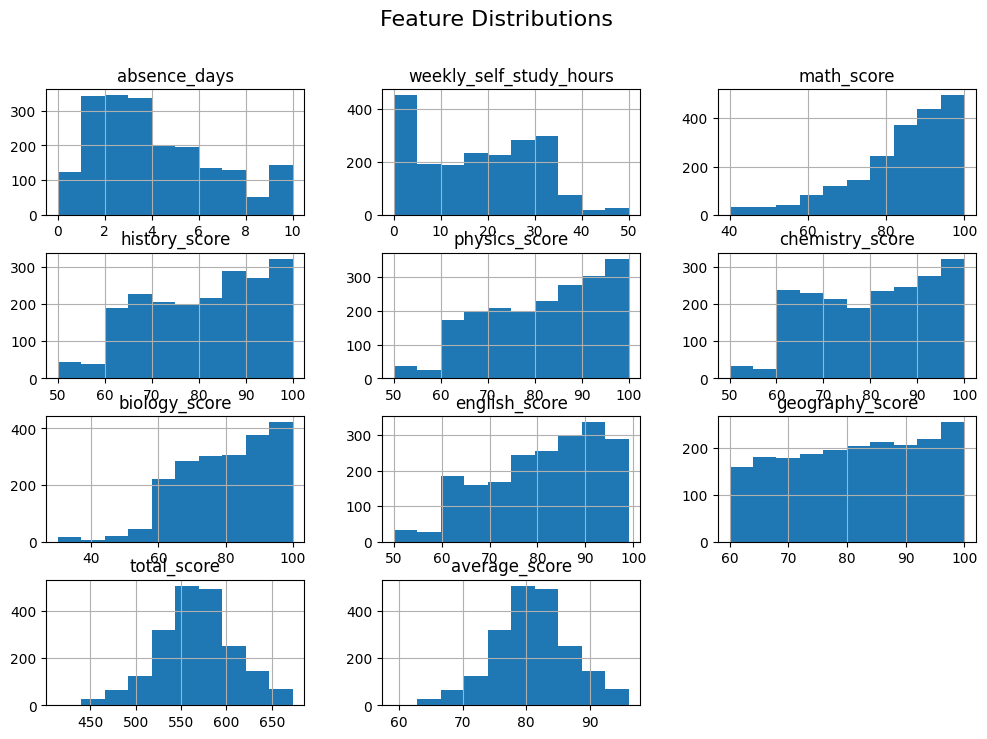

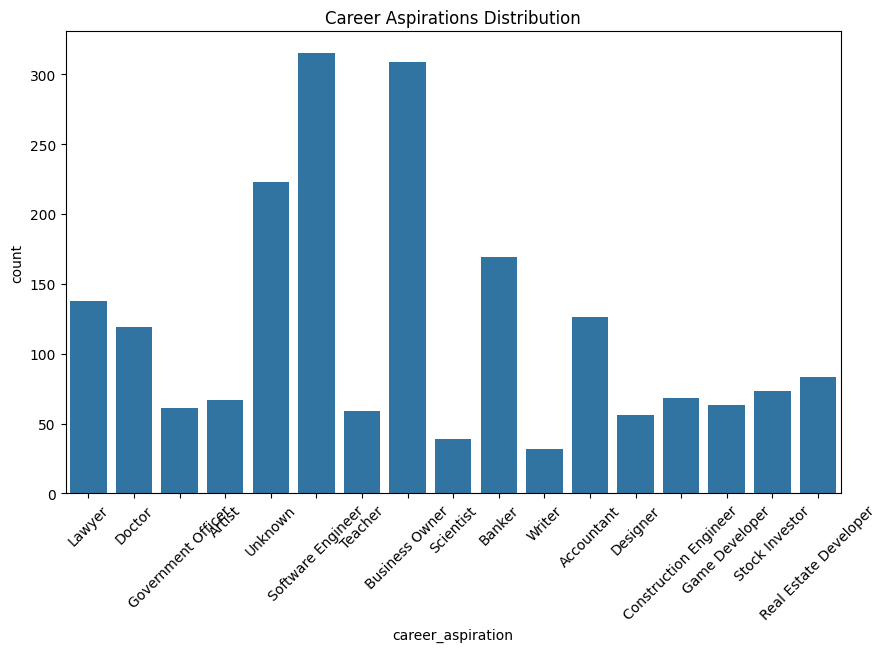

In [7]:
# Distribution of scores
df.hist(figsize=(12, 8))
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

# Career aspiration counts
plt.figure(figsize=(10,6))
sns.countplot(x='career_aspiration', data=df)
plt.xticks(rotation=45)
plt.title("Career Aspirations Distribution")
plt.show()

### Feature Mapping

In [17]:
gender_map = {'male': 0, 'female': 1}
part_time_job_map = {False: 0, True: 1}
extracurricular_activities_map = {False: 0, True: 1}
career_aspiration_map = {
        'Lawyer': 0, 'Doctor': 1, 'Government Officer': 2, 'Artist': 3, 'Unknown': 4,
        'Software Engineer': 5, 'Teacher': 6, 'Business Owner': 7, 'Scientist': 8,
        'Banker': 9, 'Writer': 10, 'Accountant': 11, 'Designer': 12,
        'Construction Engineer': 13, 'Game Developer': 14, 'Stock Investor': 15,
        'Real Estate Developer': 16
    }

In [18]:
df['gender'] = df['gender'].map(gender_map)

In [19]:
df['part_time_job'] = df['part_time_job'].map(part_time_job_map)


In [20]:
df['extracurricular_activities'] = df['extracurricular_activities'].map(extracurricular_activities_map)

In [21]:
df['career_aspiration'] = df['career_aspiration'].map(career_aspiration_map)

In [22]:
df.head()

,gender,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,career_aspiration,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score
0,0,0,3,0,27,0,73,81,93,97,63,80,87
1,1,0,2,0,47,1,90,86,96,100,90,88,90
2,1,0,9,1,13,2,81,97,95,96,65,77,94
3,1,0,5,0,3,3,71,74,88,80,89,63,86
4,0,0,5,0,10,4,84,77,65,65,80,74,76


In [23]:
df['career_aspiration'].unique()


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16],
      dtype=int64)

In [24]:
df['career_aspiration'].value_counts()

career_aspiration
5     315
7     309
4     223
9     169
0     138
11    126
1     119
16     83
15     73
13     68
3      67
14     63
2      61
6      59
12     56
8      39
10     32
Name: count, dtype: int64

### Feature Correlation Analysis

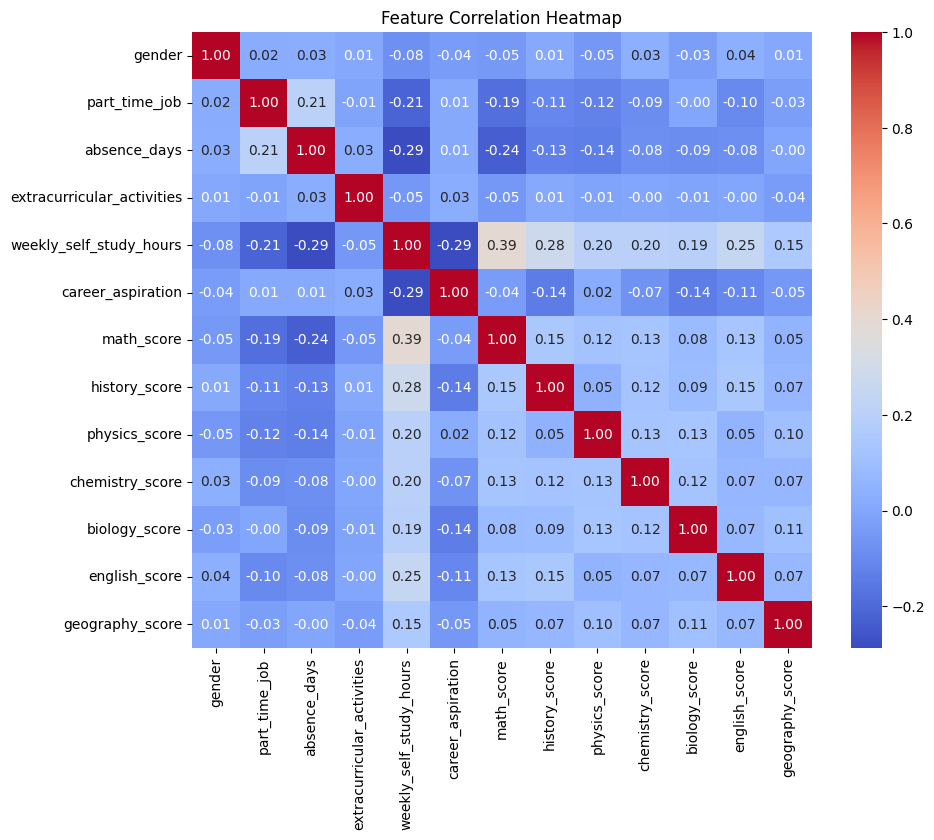

In [25]:
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

### Feature Selection

In [28]:
df["total_score"] = df["math_score"] + df["history_score"] + df["physics_score"] + df["chemistry_score"] + df["biology_score"] + df["english_score"] + df["geography_score"]
df["average_score"] = df["total_score"] / 7
df.head()

,gender,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,career_aspiration,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score,total_score,average_score
0,0,0,3,0,27,0,73,81,93,97,63,80,87,574,82.000000
1,1,0,2,0,47,1,90,86,96,100,90,88,90,640,91.428571
2,1,0,9,1,13,2,81,97,95,96,65,77,94,605,86.428571
3,1,0,5,0,3,3,71,74,88,80,89,63,86,551,78.714286
4,0,0,5,0,10,4,84,77,65,65,80,74,76,521,74.428571


In [62]:
from imblearn.over_sampling import SMOTE

# Create SMOTE object
smote = SMOTE(random_state=42)

# Separate features and target variable
X = df.drop('career_aspiration', axis=1)
y = df['career_aspiration']

### Class Imbalance Handling

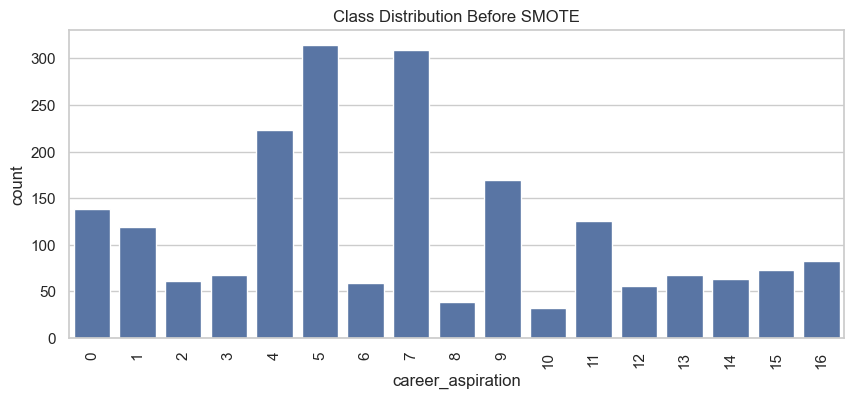

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

# Before SMOTE
plt.figure(figsize=(10, 4))
sns.countplot(x=y)
plt.title('Class Distribution Before SMOTE')
plt.xticks(rotation=90)
plt.show()

In [64]:
# Apply SMOTE to the data
X_resampled, y_resampled = smote.fit_resample(X, y)

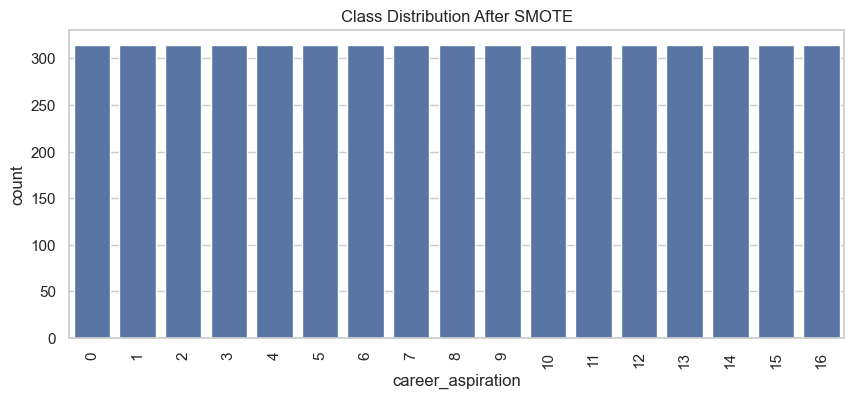

In [65]:
# After SMOTE
plt.figure(figsize=(10, 4))
sns.countplot(x=y_resampled)
plt.title('Class Distribution After SMOTE')
plt.xticks(rotation=90)
plt.show()

In [38]:
X_resampled.shape

(5355, 14)

### Train-Test Split

In [40]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_resampled,y_resampled,test_size=0.2, random_state=42)

In [41]:
X_train.shape, y_train.shape

((4284, 14), (4284,))

### Feature Scaling

In [43]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Model Training and Evaluation

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [45]:
# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "Support Vector Classifier": SVC(),
    "Random Forest Classifier": RandomForestClassifier(),
    "K Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
    "XGBoost Classifier": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}

In [52]:
from sklearn.metrics import precision_score, recall_score, f1_score
import pandas as pd

# Store results
results = []

# Train and evaluate each model
for name, model in models.items():
    print("="*100)
    print("Model:", name)
    
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    # Metrics
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Print results
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision (macro): {precision:.4f}")
    print(f"Recall (macro): {recall:.4f}")
    print(f"F1 Score (macro): {f1:.4f}")
    print("Confusion Matrix:\n", conf_matrix)
    print("Classification Report:\n", classification_report(y_test, y_pred))
    
    # Store in list
    results.append({
        'Model': name,
        'Accuracy': acc,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    })

# Convert to DataFrame
results_df = pd.DataFrame(results)

Model: Logistic Regression
Accuracy: 0.4855
Precision (macro): 0.4616
Recall (macro): 0.4882
F1 Score (macro): 0.4608
Confusion Matrix:
 [[37  4  0  0  0  7  0  0  4  1 10  3  0  2  0  0  0]
 [ 2 45  0  0  0  7  0  0 13  0  0  0  0  5  0  0  0]
 [ 0  0 25  5  1  1  9  1  0  0  2  0  4  1  2  2  4]
 [ 0  0  2 32  0  0  3  1  0  0  0  0  0  0 11  0  9]
 [ 6  5  7  3 11  9  7  1  2  3  0  3  3  2  1  2  1]
 [ 8 10  0  0  1 24  1  0  0  7  1  5  3 12  0  4  0]
 [ 0  0  0  0  1  2 65  0  0  1  2  0  0  0  0  0  0]
 [ 0  0  0  3  0  0  0 55  0  0  0  0  0  0  3  0  0]
 [ 3 18  0  0  0  1  0  0 24  0  6  0  0  1  0  0  0]
 [10  1  0  0  3  8  8  0  1  6  2  8  6  6  0  2  0]
 [ 8  2  0  0  1  0  4  0  2  1 45  0  0  0  0  0  0]
 [ 0  1  0  0  4  6  3  0  4  1  0 24  1  3  0  6  0]
 [ 2  2  9  3  4  2  7  0  3  0  4  0 11  6  8  5  2]
 [ 1  2  2  0  3  0  0  0  5  1  1  4  4 27  0  5  0]
 [ 0  0  0  4  0  0  0  0  0  0  0  0  0  0 52  0  1]
 [ 5  3  3  0  4  8  1  2  0  0  2  7  4  7  1 15  1]

<Figure size 1200x600 with 0 Axes>

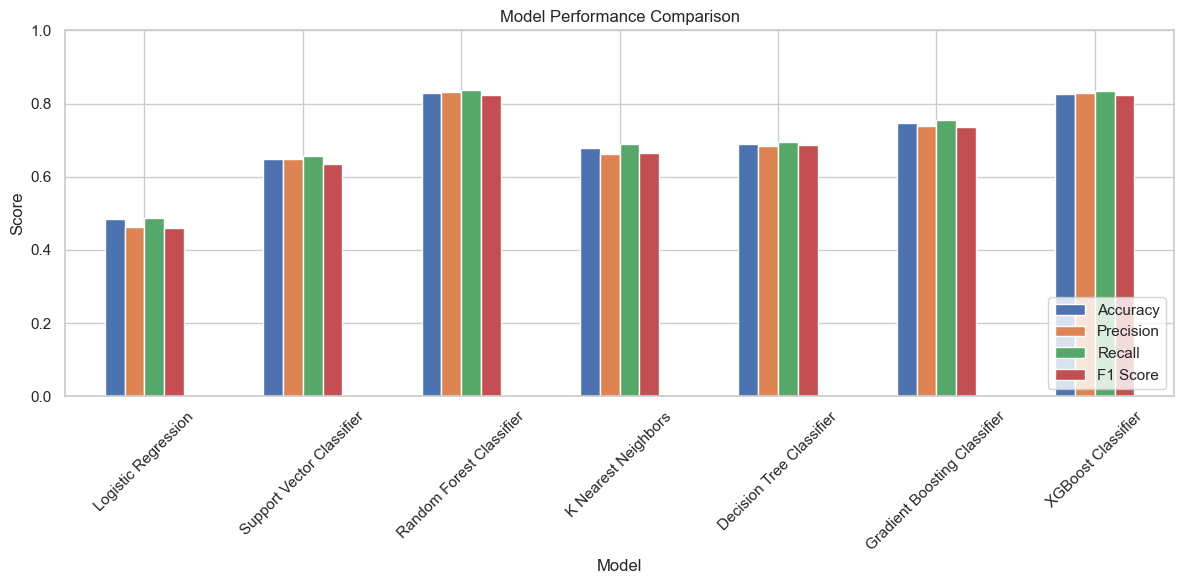

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.set(style='whitegrid')
results_df.set_index('Model').plot(kind='bar', figsize=(12, 6))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

### Final Model Selection: RF 

In [55]:
model = RandomForestClassifier()

model.fit(X_train_scaled, y_train)
# Predict on test set
y_pred = model.predict(X_test_scaled)

In [56]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print("Final Model Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Final Model Accuracy: 0.830999066293184
Confusion Matrix:
 [[58  5  0  0  1  1  0  0  0  1  1  0  0  0  0  1  0]
 [ 0 72  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 55  0  0  0  1  0  0  0  0  0  0  0  0  0  1]
 [ 0  0  0 55  0  0  0  1  0  0  0  0  0  0  2  0  0]
 [ 4  3  6  0 29  9  2  0  2  3  1  2  2  0  1  0  2]
 [ 7  7  0  0  3 27  1  0  7 12  0  1  0  8  0  3  0]
 [ 0  0  0  0  0  0 71  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0 58  0  0  0  0  0  0  2  0  0]
 [ 0  1  0  0  0  0  0  0 52  0  0  0  0  0  0  0  0]
 [ 3  1  1  0  0  3  1  0  2 45  2  1  2  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  0  0 62  0  0  0  0  0  0]
 [ 0  2  0  0  1  4  1  0  2  1  0 40  0  2  0  0  0]
 [ 0  0  2  0  1  1  1  0  1  1  1  0 58  0  1  0  1]
 [ 0  0  2  0  0  0  0  0  3  0  0  0  0 49  0  1  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0  0  0 56  0  0]
 [ 3  1  1  0  1  3  0  0  0  0  0  2  0  5  0 47  0]
 [ 0  0  6  5  0  0  0  1  1  0  0  0  0  0  0  0 56]]
Classification Report:

### Feature Importance using RF

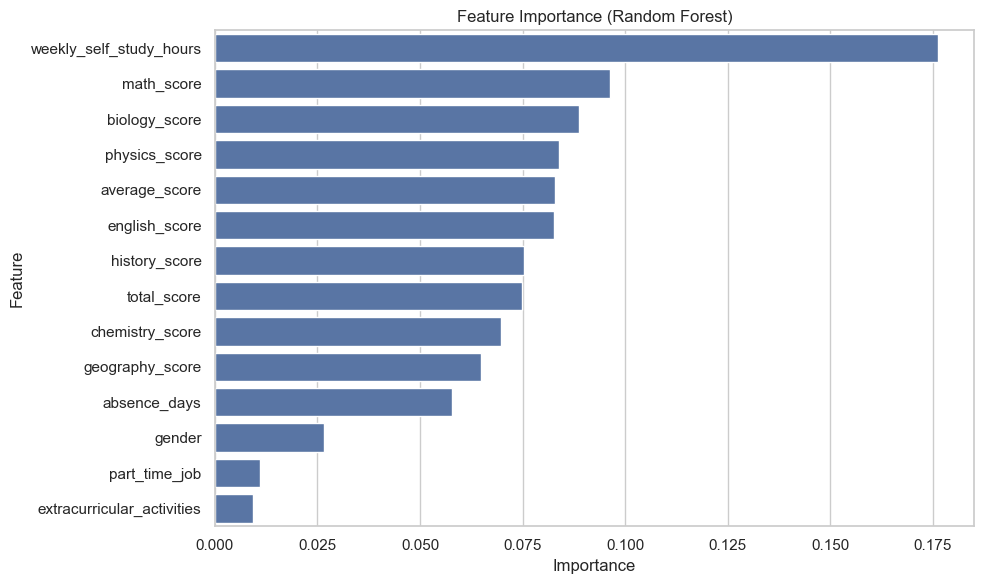

In [57]:
importances = model.feature_importances_
feat_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_df)
plt.title("Feature Importance (Random Forest)")
plt.tight_layout()
plt.show()

### Cross-Validation and ROC-AUC Curves

In [59]:
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score

# Cross-Validation
cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy (mean):", cv_scores.mean())

# ROC AUC
y_test_bin = label_binarize(y_test, classes=list(range(len(df['career_aspiration'].unique()))))
y_scores = model.predict_proba(X_test_scaled)
roc_auc = roc_auc_score(y_test_bin, y_scores, average='macro', multi_class='ovr')
print("ROC AUC:", roc_auc)

Cross-Validation Accuracy (mean): 0.8050943848896935
ROC AUC: 0.9858430493156561


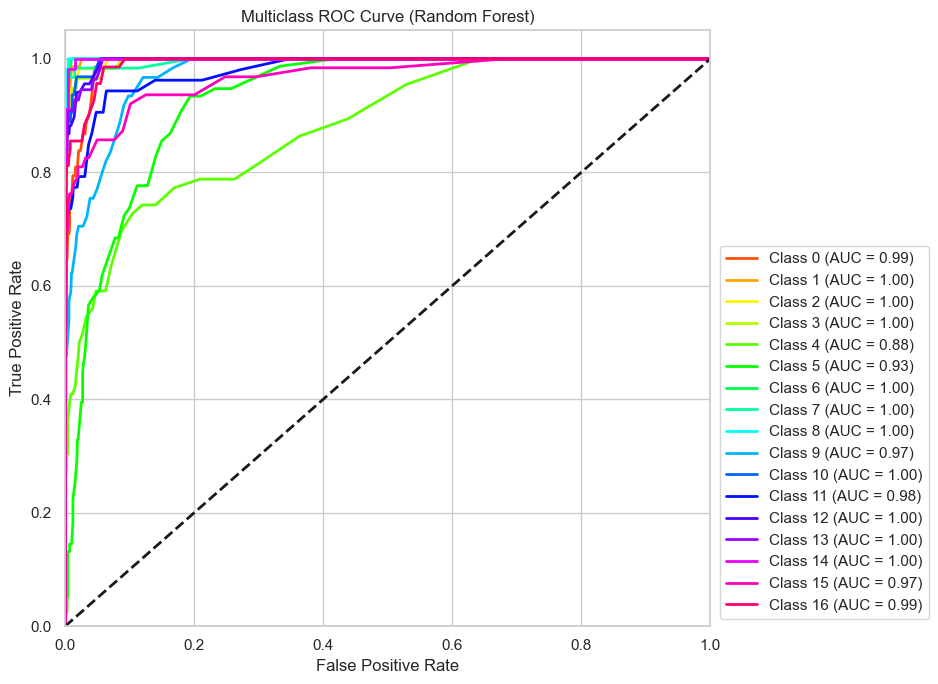

In [60]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Binarize the output labels
classes = df['career_aspiration'].unique()
y_test_bin = label_binarize(y_test, classes=classes)
n_classes = y_test_bin.shape[1]

# Train OvR classifier
ovr_model = OneVsRestClassifier(RandomForestClassifier(random_state=42))
ovr_model.fit(X_train_scaled, label_binarize(y_train, classes=classes))
y_score = ovr_model.predict_proba(X_test_scaled)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
colors = cycle(sns.color_palette("hsv", n_classes))
plt.figure(figsize=(10, 7))

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'Class {classes[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve (Random Forest)')
plt.legend(loc="lower right", bbox_to_anchor=(1.35, 0))
plt.tight_layout()
plt.show()


### Model and Scalar Saving

In [66]:
import pickle
import os

# Ensure the "model" directory exists
os.makedirs("model", exist_ok=True)

# Save the scaler and model
pickle.dump(scaler, open("model/scaler.pkl", 'wb'))
pickle.dump(model, open("model/ourmodel.pkl", 'wb'))

print("Model saved successfully!")


Model saved successfully!


In [67]:
# Load the scaler, label encoder, and model
scaler = pickle.load(open("model/scaler.pkl", 'rb'))
model = pickle.load(open("model/ourmodel.pkl", 'rb'))

### Test Input

In [68]:
import pickle
import numpy as np

# Load the scaler, label encoder, model, and class names
scaler = pickle.load(open("model/scaler.pkl", 'rb'))
Model = pickle.load(open("model/ourmodel.pkl", 'rb'))
class_names = ['Lawyer', 'Doctor', 'Government Officer', 'Artist', 'Unknown',
               'Software Engineer', 'Teacher', 'Business Owner', 'Scientist',
               'Banker', 'Writer', 'Accountant', 'Designer',
               'Construction Engineer', 'Game Developer', 'Stock Investor',
               'Real Estate Developer']

def Recommendations(gender, part_time_job, absence_days, extracurricular_activities,
                    weekly_self_study_hours, math_score, history_score, physics_score,
                    chemistry_score, biology_score, english_score, geography_score,
                    total_score,average_score):
    
    # Encode categorical variables
    gender_encoded = 1 if gender.lower() == 'female' else 0
    part_time_job_encoded = 1 if part_time_job else 0
    extracurricular_activities_encoded = 1 if extracurricular_activities else 0
    
    # Create feature array
    feature_array = np.array([[gender_encoded, part_time_job_encoded, absence_days, extracurricular_activities_encoded,
                               weekly_self_study_hours, math_score, history_score, physics_score,
                               chemistry_score, biology_score, english_score, geography_score,total_score,average_score]])
    
    # Scale features
    scaled_features = scaler.transform(feature_array)
    
    # Predict using the model
    probabilities = model.predict_proba(scaled_features)
    
    # Get top five predicted classes along with their probabilities
    top_classes_idx = np.argsort(-probabilities[0])[:5]
    top_classes_names_probs = [(class_names[idx], probabilities[0][idx]) for idx in top_classes_idx]
    
    return top_classes_names_probs

In [69]:
# Example usage 
final_recommendations = Recommendations(gender='female',
                                        part_time_job=False,
                                        absence_days=2,
                                        extracurricular_activities=False,
                                        weekly_self_study_hours=7,
                                        math_score=65,
                                        history_score=60,
                                        physics_score=97,
                                        chemistry_score=94,
                                        biology_score=71,
                                        english_score=81,
                                        geography_score=66,
                                        total_score=534,
                                        average_score=76.285714)

print("Top recommended studies with probabilities:")
print("="*50)
for class_name, probability in final_recommendations:
    print(f"{class_name} with probability {probability}")

Top recommended studies with probabilities:
Teacher with probability 0.8
Real Estate Developer with probability 0.06
Unknown with probability 0.05
Government Officer with probability 0.03
Designer with probability 0.02
